In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#np.random.seed(101)

In [5]:
##reading the data
data= pd.read_csv("F:\machinfy\mohamed\working\working machinfy\housing10.csv", sep=',',encoding="utf-8")

In [323]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male


In [324]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male
20639,-121.24,39.37,16.0,2785,616.0,1387.0,530,2.3886,89400,INLAND,female


In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [326]:
data.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


In [327]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,19335,17873.000000,20640.000000,20640,16620
unique,NaN,NaN,NaN,NaN,NaN,NaN,1703,NaN,NaN,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,<1H OCEAN,female
freq,NaN,NaN,NaN,NaN,NaN,NaN,3080,NaN,NaN,9136,8673
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,NaN,3.940685,206855.816909,NaN,NaN
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,NaN,1.943736,115395.615874,NaN,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,NaN,0.499900,14999.000000,NaN,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,NaN,2.598600,119600.000000,NaN,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,NaN,3.587100,179700.000000,NaN,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,NaN,4.830400,264725.000000,NaN,NaN


In [328]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640,NaN,NaN,NaN,-119.57,2.00353,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640,NaN,NaN,NaN,35.6319,2.13595,32.54,33.93,34.26,37.71,41.95
housing_median_age,20382,NaN,NaN,NaN,28.6763,12.5893,1,18,29,37,52
total_rooms,20640,NaN,NaN,NaN,2635.76,2181.62,2,1447.75,2127,3148,39320
total_bedrooms,15758,NaN,NaN,NaN,539.92,419.834,1,296,435,652,6210
population,20596,NaN,NaN,NaN,1424.93,1132.24,3,787,1166,1725,35682
households,19335,1703,no,3080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_income,17873,NaN,NaN,NaN,3.94068,1.94374,0.4999,2.5986,3.5871,4.8304,15.0001
median_house_value,20640,NaN,NaN,NaN,206856,115396,14999,119600,179700,264725,500001
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

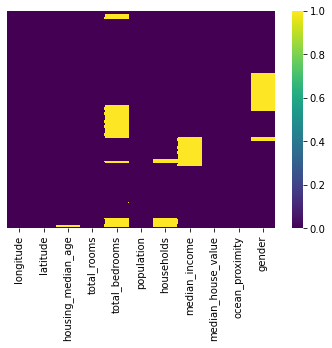

In [330]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=True ,yticklabels =False)
plt.show()

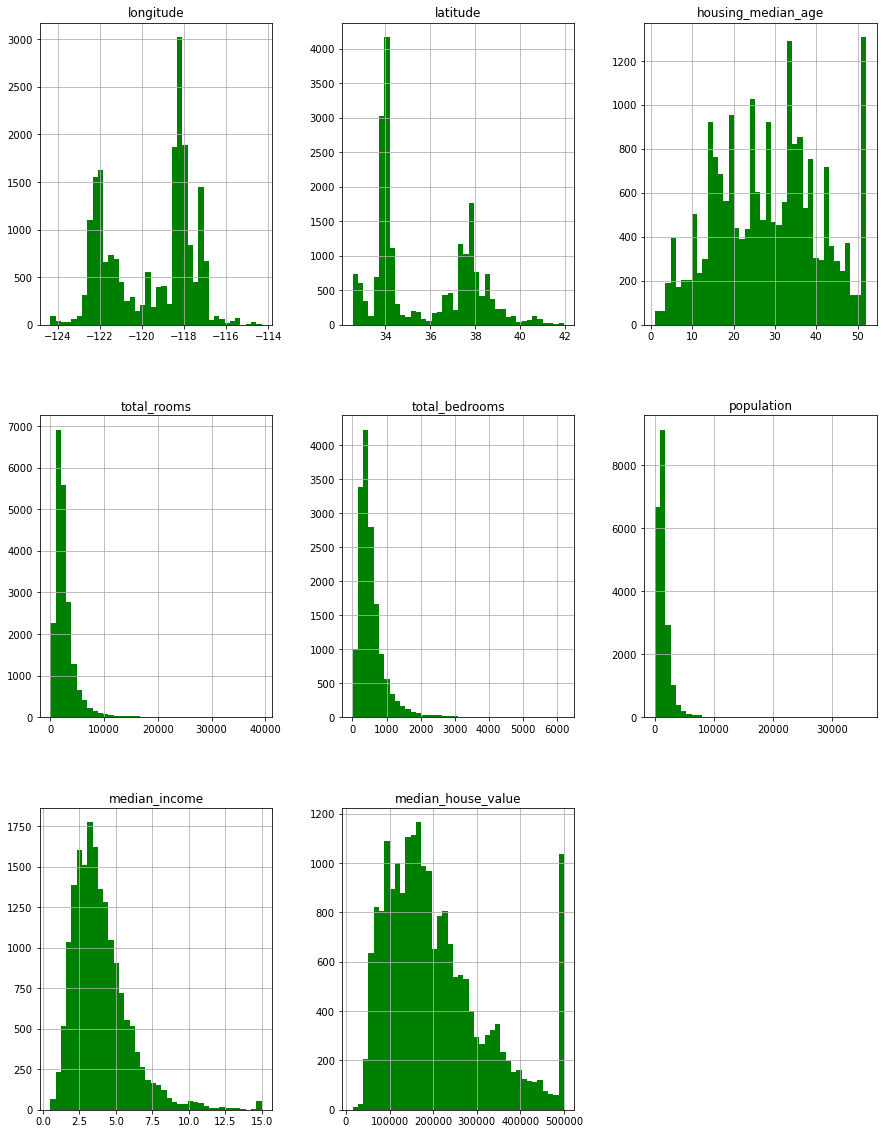

In [331]:
data.hist(bins=40, figsize=(15,20), color='green')
plt.show()

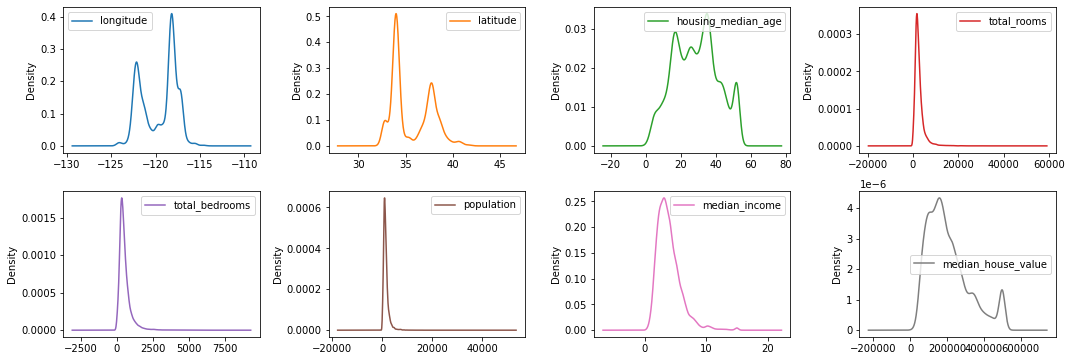

In [332]:
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(15,10))
plt.tight_layout()

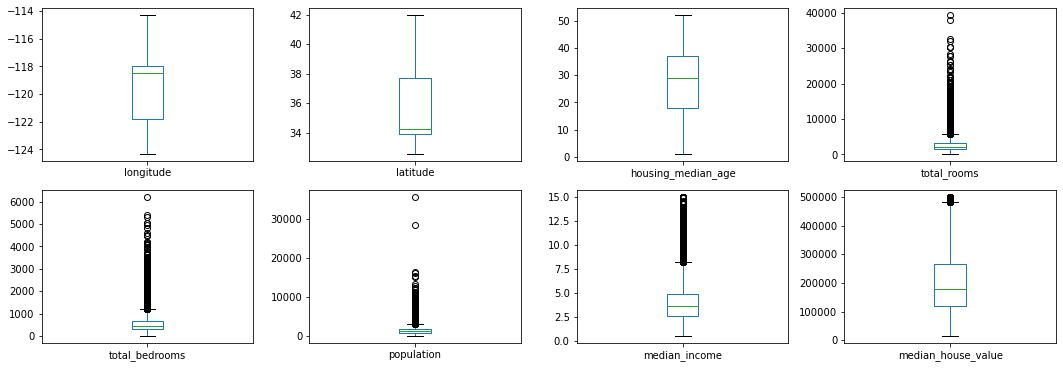

In [333]:
data.plot(kind='box',subplots=True,layout=(4,4),sharex=False,figsize=(15,10))
plt.tight_layout()

In [334]:
data.drop('gender', axis=1 , inplace=True)

In [335]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY


In [336]:
data.dropna(thresh=9, inplace=True)

In [337]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY
13,-122.26,37.84,52.0,696,191.0,345.0,NaN,2.6736,191300,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND


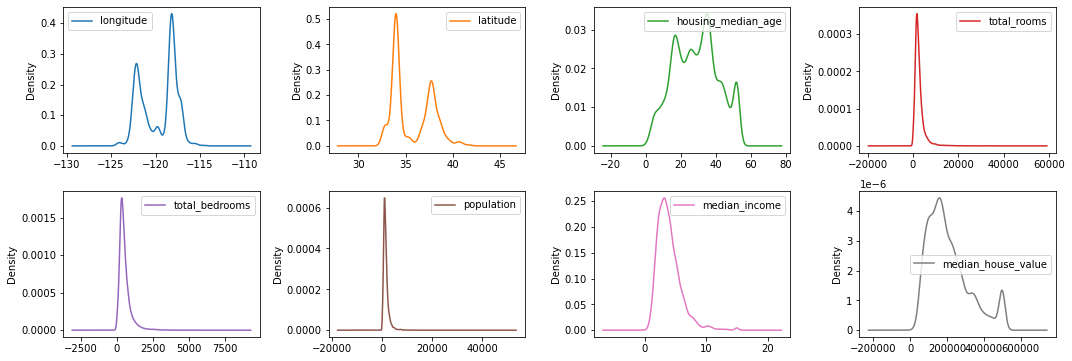

In [338]:
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(15,10))
plt.tight_layout()

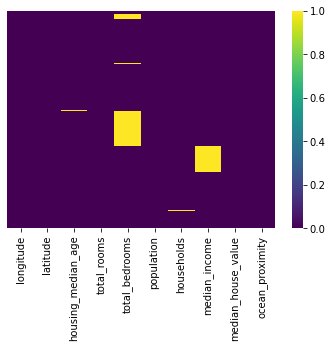

In [339]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=True ,yticklabels =False)
plt.show()

In [340]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age      36
total_rooms              0
total_bedrooms        3683
population              29
households              53
median_income         2323
median_house_value       0
ocean_proximity          0
dtype: int64

In [341]:
data_mean=data['median_income'].mean()

In [342]:
data_mean

3.963598201757007

In [343]:
data_mode=data['median_income'].mode()

In [235]:
data_mode

0    15.0001
dtype: float64

In [344]:
list=[3.9635,15.0001,4.1250,2.6250]
data['median_income']=data['median_income'].fillna(pd.Series(np.random.choice(list, size=len(data.index))))
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY
13,-122.26,37.84,52.0,696,191.0,345.0,NaN,2.6736,191300,NEAR BAY


In [345]:
data['median_income'].value_counts()

15.0001    660
4.1250     605
2.6250     600
3.9635     578
2.8750      40
          ... 
4.0452       1
7.7848       1
7.1621       1
6.6689       1
2.5577       1
Name: median_income, Length: 11115, dtype: int64

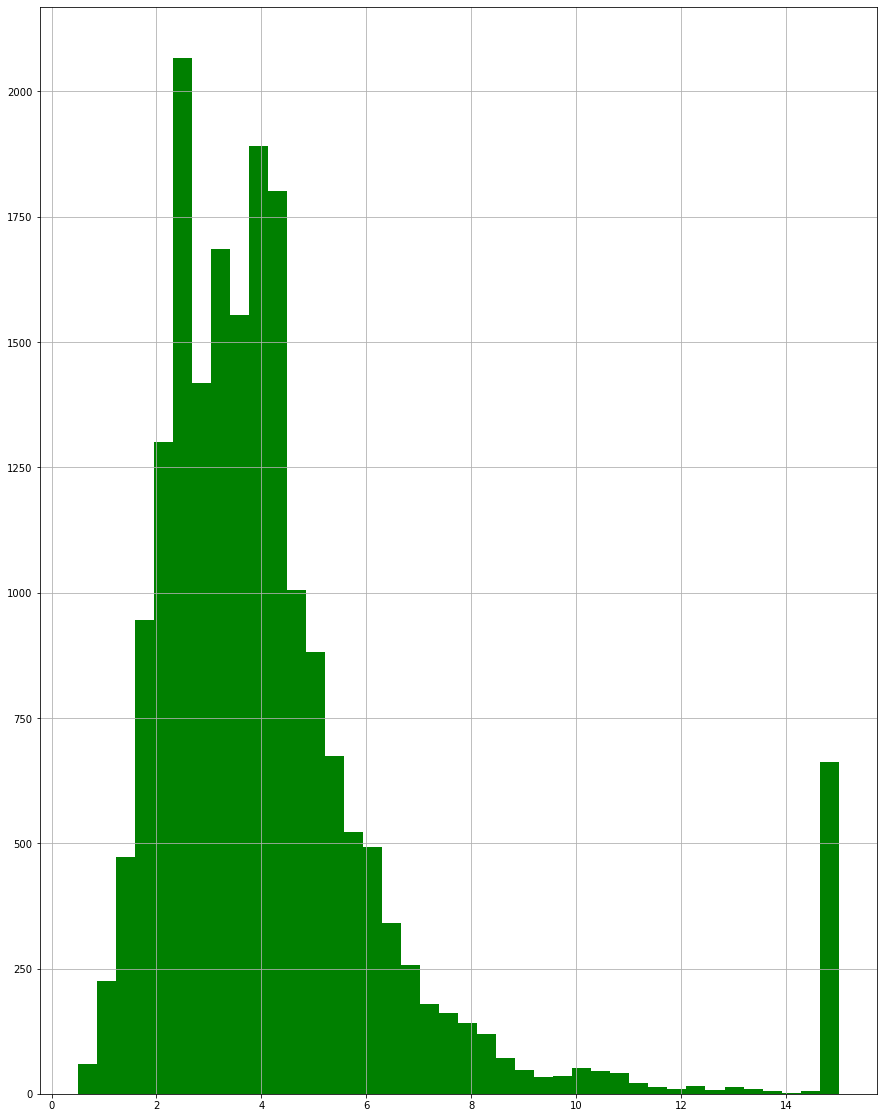

In [346]:
data['median_income'].hist(bins=40, figsize=(15,20), color='green')
plt.show()

In [347]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age      36
total_rooms              0
total_bedrooms        3683
population              29
households              53
median_income            0
median_house_value       0
ocean_proximity          0
dtype: int64

In [348]:
data['housing_median_age'].value_counts()

52.0    1223
36.0     821
35.0     784
16.0     707
34.0     655
17.0     641
33.0     578
26.0     563
32.0     519
25.0     516
18.0     515
37.0     513
15.0     470
19.0     462
27.0     442
24.0     441
30.0     440
28.0     439
31.0     434
29.0     427
20.0     418
21.0     406
23.0     405
14.0     380
38.0     369
22.0     355
42.0     354
44.0     341
39.0     341
43.0     336
40.0     294
45.0     286
41.0     282
13.0     279
10.0     240
46.0     239
11.0     226
5.0      225
12.0     217
8.0      196
47.0     192
9.0      187
4.0      186
48.0     173
7.0      163
6.0      143
49.0     132
50.0     128
3.0       59
2.0       56
51.0      46
1.0        4
Name: housing_median_age, dtype: int64

In [349]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age      36
total_rooms              0
total_bedrooms        3683
population              29
households              53
median_income            0
median_house_value       0
ocean_proximity          0
dtype: int64

In [350]:
data['housing_median_age'].mean()

28.857335827098918

In [351]:
data['housing_median_age'].replace(np.nan , data['housing_median_age'].mean() , inplace = True)

In [352]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        3683
population              29
households              53
median_income            0
median_house_value       0
ocean_proximity          0
dtype: int64

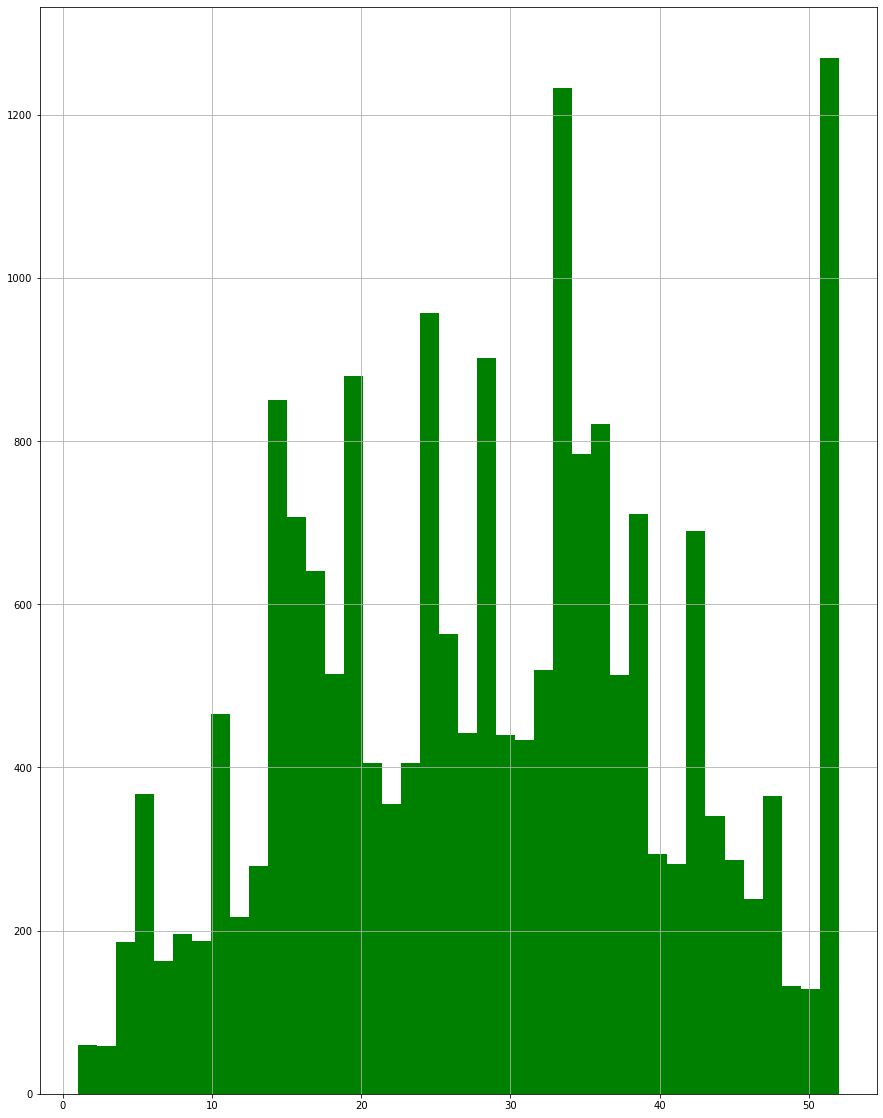

In [353]:
data['housing_median_age'].hist(bins=40, figsize=(15,20), color='green')
plt.show()

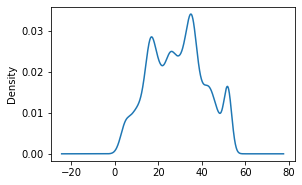

In [354]:
data['housing_median_age'].plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(15,10))
plt.tight_layout()

In [355]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        3683
population              29
households              53
median_income            0
median_house_value       0
ocean_proximity          0
dtype: int64

In [356]:
data['households'].value_counts()

no      3069
282       46
306       45
380       45
375       44
        ... 
1125       1
1381       1
1907       1
1060       1
889        1
Name: households, Length: 1696, dtype: int64

In [357]:
data['households'] = data['households'].replace('no' , np.nan)

In [358]:
data['households'].value_counts()

282     46
380     45
306     45
375     44
239     42
        ..
1126     1
1381     1
2100     1
2826     1
2125     1
Name: households, Length: 1695, dtype: int64

In [359]:
type('households')

str

In [360]:
data['households'] = pd.to_numeric(data['households']) 

In [361]:
type('households')

str

In [254]:
data['households']=data['households'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [362]:
data['households'].value_counts()

282.0     46
380.0     45
306.0     45
375.0     44
239.0     42
          ..
1729.0     1
1858.0     1
1583.0     1
2723.0     1
1442.0     1
Name: households, Length: 1695, dtype: int64

In [363]:
data['households'] = data['households'].fillna(1)
data.head(50)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300,NEAR BAY
13,-122.26,37.84,52.0,696,191.0,345.0,1.0,2.6736,191300,NEAR BAY
14,-122.26,37.85,52.0,2643,626.0,1212.0,1.0,1.9167,159200,NEAR BAY
15,-122.26,37.85,50.0,1120,283.0,697.0,1.0,2.1250,140000,NEAR BAY
16,-122.27,37.85,52.0,1966,347.0,793.0,1.0,2.7750,152500,NEAR BAY
17,-122.27,37.85,52.0,1228,293.0,648.0,303.0,2.1202,155500,NEAR BAY
18,-122.26,37.84,50.0,2239,455.0,990.0,419.0,1.9911,158700,NEAR BAY


In [364]:
data['households'].value_counts()

1.0       3123
282.0       46
306.0       45
380.0       45
375.0       44
          ... 
1858.0       1
1583.0       1
2723.0       1
1060.0       1
1442.0       1
Name: households, Length: 1695, dtype: int64

In [365]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        3683
population              29
households               0
median_income            0
median_house_value       0
ocean_proximity          0
dtype: int64

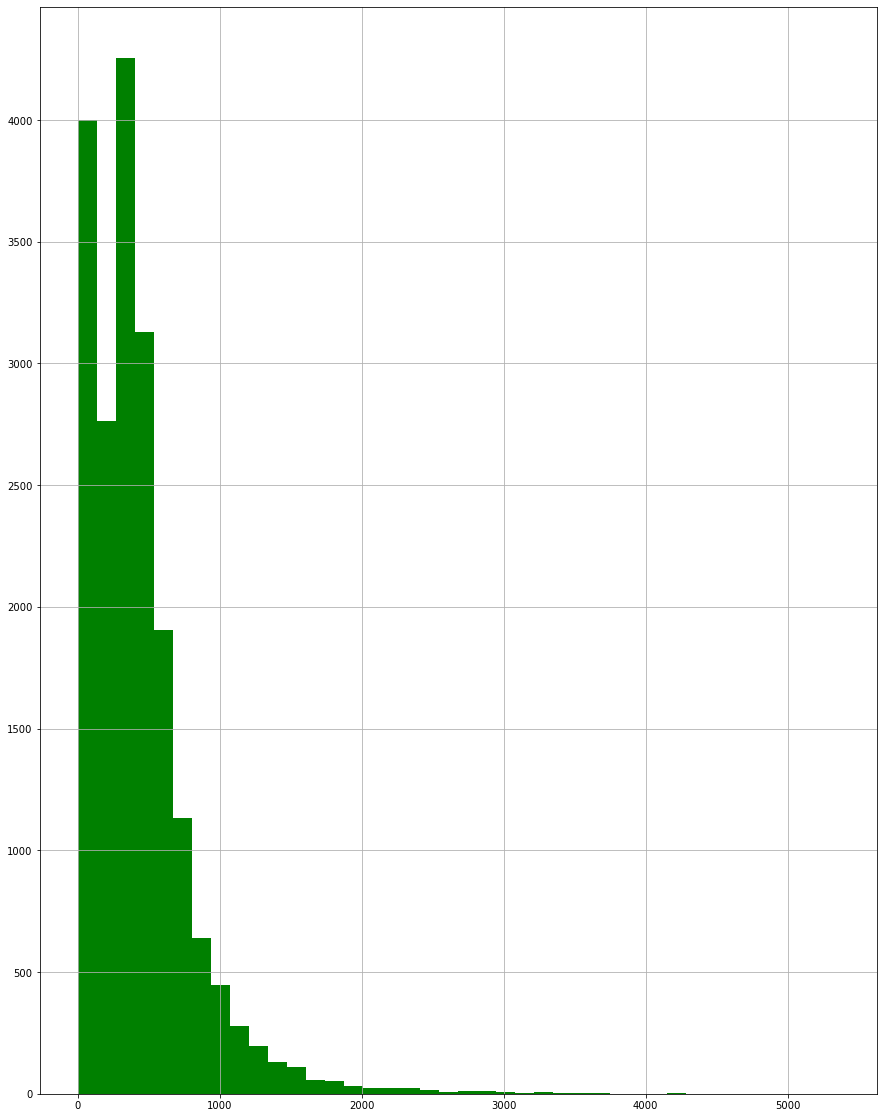

In [366]:
data['households'].hist(bins=40, figsize=(15,20), color='green')
plt.show()

In [367]:
data['total_bedrooms'].max()

6210.0

In [368]:
data['total_bedrooms'].min()

1.0

In [369]:
data['total_bedrooms'].mean()

540.5933594000385

In [370]:
data['total_bedrooms'].mode()

0    280.0
dtype: float64

In [371]:
data['total_bedrooms'].median()

435.0

In [372]:
data['total_bedrooms'].replace(np.nan , data['total_bedrooms'].mean() , inplace = True)

In [373]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300,NEAR BAY
13,-122.26,37.84,52.0,696,191.0,345.0,1.0,2.6736,191300,NEAR BAY


In [374]:
data.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population            29
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

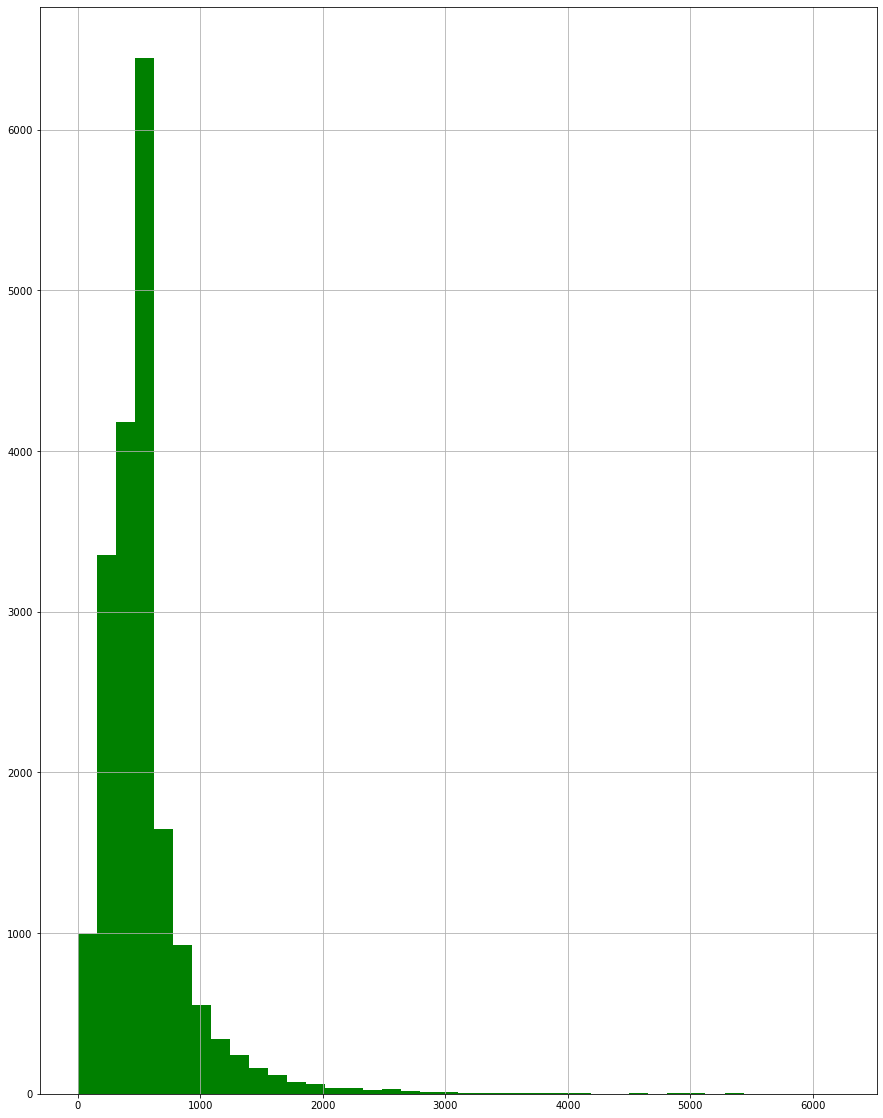

In [375]:
data['total_bedrooms'].hist(bins=40, figsize=(15,20), color='green')
plt.show()

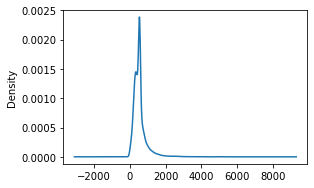

In [376]:
data['total_bedrooms'].plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(15,10))
plt.tight_layout()

In [377]:
data['population'].value_counts()

850.0     23
825.0     23
761.0     22
1227.0    22
891.0     22
          ..
2379.0     1
3191.0     1
123.0      1
2992.0     1
3591.0     1
Name: population, Length: 3819, dtype: int64

In [378]:
data['population'].max()

35682.0

In [379]:
data['population'].min()

3.0

In [380]:
data['population'].mean()

1427.6867307192938

In [381]:
data['population'].mode()

0    825.0
1    850.0
dtype: float64

In [382]:
data['population'].median()

1167.0

In [383]:
data['population'].replace(np.nan , data['population'].mean() , inplace = True)

In [384]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [385]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300,NEAR BAY
13,-122.26,37.84,52.0,696,191.0,345.0,1.0,2.6736,191300,NEAR BAY


In [386]:
from sklearn.preprocessing import LabelEncoder

In [387]:
labelEncoder = LabelEncoder()
print(data["ocean_proximity"].value_counts())
data["ocean_proximity"] = labelEncoder.fit_transform(data["ocean_proximity"])
data["ocean_proximity"].value_counts()
data.describe()

<1H OCEAN     8916
INLAND        5950
NEAR BAY      2281
NEAR OCEAN    2132
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,19284.000000,19284.000000,19284.000000,19284.000000,19284.000000,19284.000000,19284.000000,19284.000000,19284.000000,19284.000000
mean,-119.610450,35.664153,28.857336,2641.018409,540.593359,1427.686731,419.323947,4.278822,208955.363099,1.106150
std,2.021006,2.121135,12.632397,2184.404567,378.850493,1134.549941,390.518511,2.677021,115360.638264,1.385497
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.840000,33.940000,18.000000,1452.000000,328.000000,790.000000,190.000000,2.625000,122800.000000,0.000000
50%,-118.460000,34.250000,29.000000,2128.000000,519.000000,1167.500000,357.000000,3.740750,181300.000000,1.000000
75%,-118.020000,37.720000,37.000000,3149.000000,586.000000,1725.000000,555.000000,4.869475,266725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,4.000000


In [388]:
data["ocean_proximity"].head(50)

0     3
1     3
2     3
3     3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    3
55    3
56    3
57    3
58    3
Name: ocean_proximity, dtype: int32

In [389]:
data["ocean_proximity"].value_counts()

0    8916
1    5950
3    2281
4    2132
2       5
Name: ocean_proximity, dtype: int64

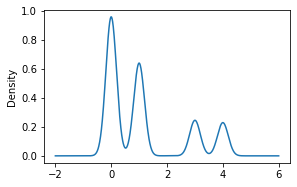

In [390]:
data["ocean_proximity"].plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(15,10))
plt.tight_layout()

<AxesSubplot:>

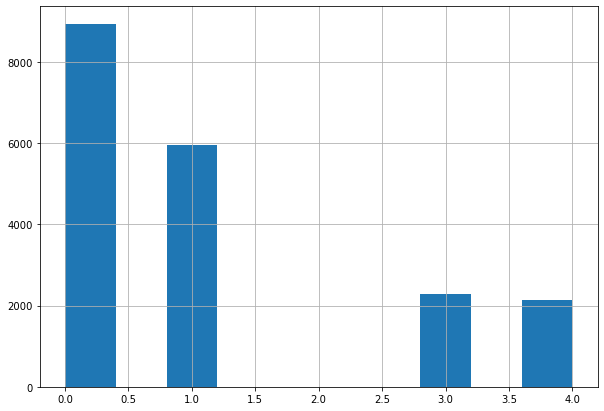

In [391]:
data["ocean_proximity"].hist(bins=10 , figsize=(10,7))

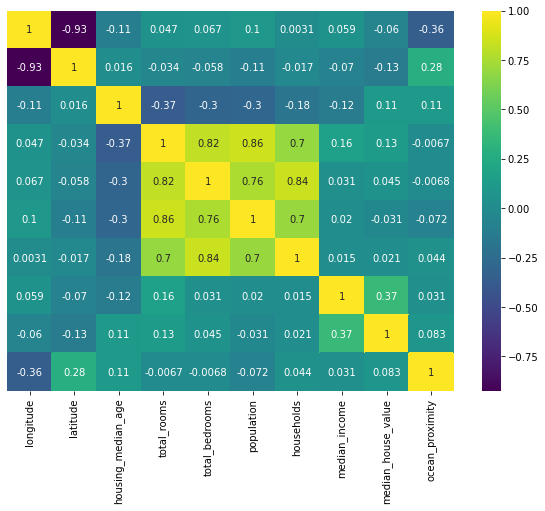

In [392]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), cmap='viridis', cbar=True , annot=True, yticklabels =False)
plt.show()

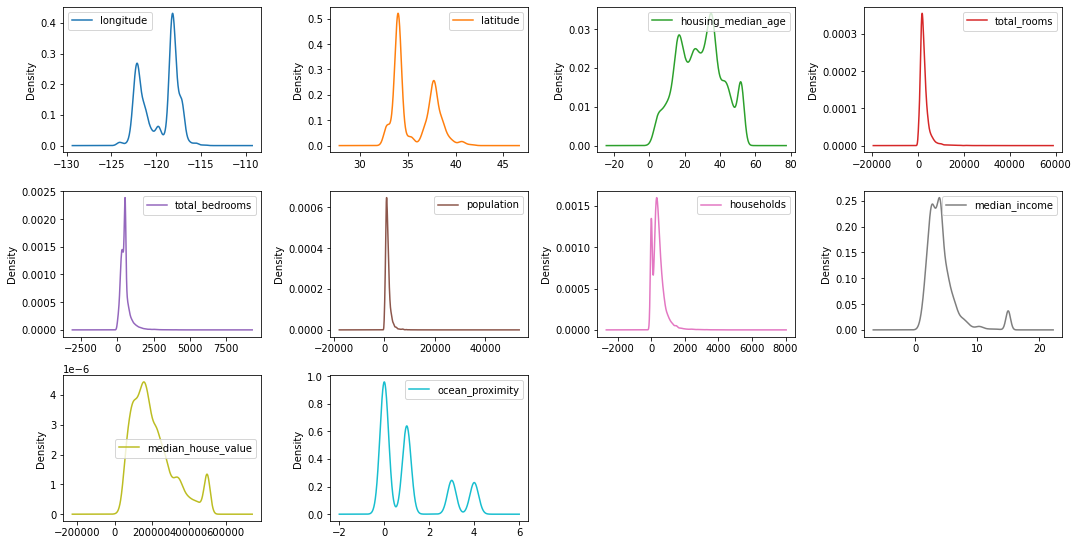

In [393]:
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(15,10))
plt.tight_layout()

In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19284 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19284 non-null  float64
 1   latitude            19284 non-null  float64
 2   housing_median_age  19284 non-null  float64
 3   total_rooms         19284 non-null  int64  
 4   total_bedrooms      19284 non-null  float64
 5   population          19284 non-null  float64
 6   households          19284 non-null  float64
 7   median_income       19284 non-null  float64
 8   median_house_value  19284 non-null  int64  
 9   ocean_proximity     19284 non-null  int32  
dtypes: float64(7), int32(1), int64(2)
memory usage: 1.5 MB


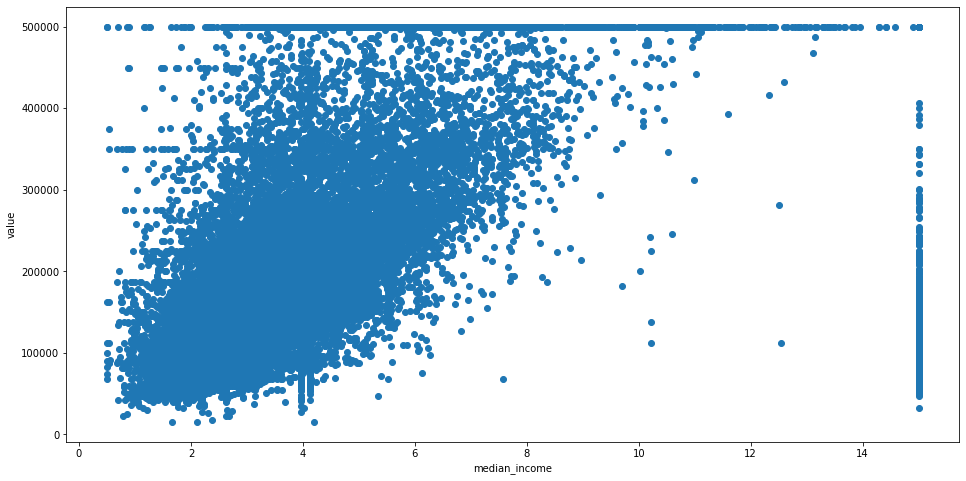

In [426]:
fig , ax = plt.subplots(figsize=(16,8))
ax.scatter (data['median_income'],data['median_house_value'])

ax.set_xlabel ('median_income')
ax.set_ylabel('value')
plt.show() 

In [424]:
print("outliers:", data[  (data['median_income']>=8 ) ] ['median_income'].count())

outliers: 1249


In [425]:
print("outliers:", data[  (data['median_income'].iloc[:,4:5  ] ['median_income'].count())

outliers: 668


In [ ]:
print("outliers:", data[  (data['median_income']>=8 ) ] ['median_income'].count())housing.iloc[:,4:5

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_income'>

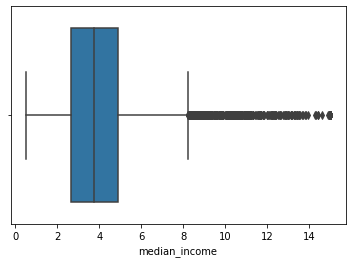

In [397]:
sns.boxplot(data['median_income'])

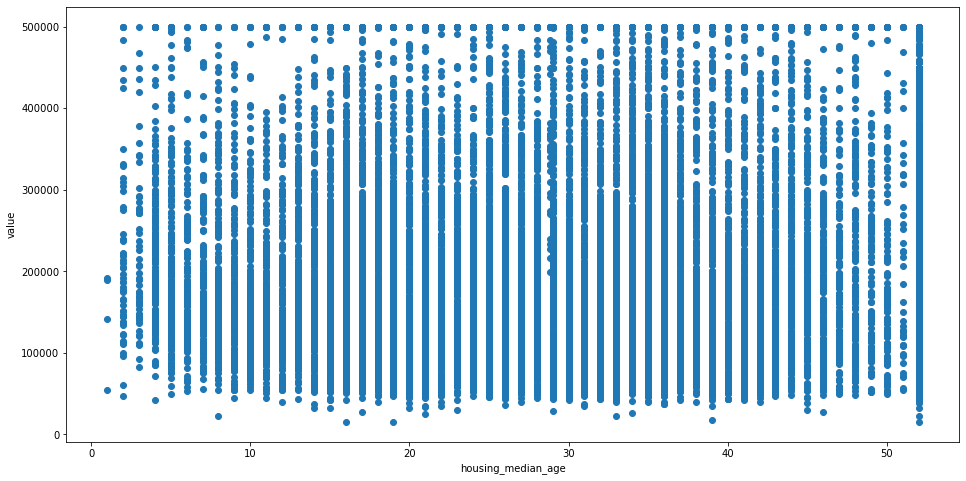

In [427]:
fig , ax = plt.subplots(figsize=(16,8))
ax.scatter (data['housing_median_age'],data['median_house_value'])

ax.set_xlabel ('housing_median_age')
ax.set_ylabel('value')
plt.show() 

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


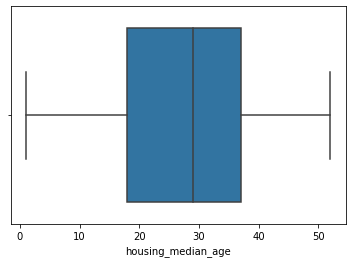

In [399]:
sns.boxplot(data['housing_median_age'])
plt.show()

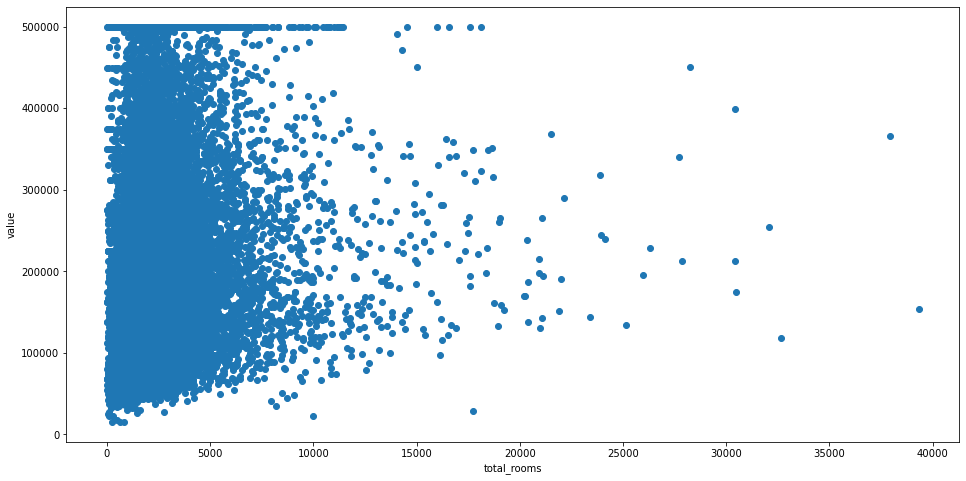

In [428]:
fig , ax = plt.subplots(figsize=(16,8))
ax.scatter (data['total_rooms'],data['median_house_value'])

ax.set_xlabel ('total_rooms')
ax.set_ylabel('value')
plt.show() 

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


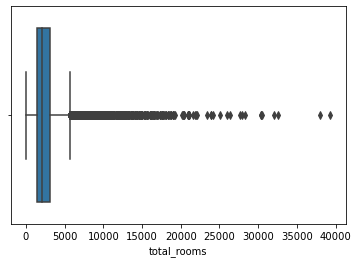

In [401]:
sns.boxplot(data['total_rooms'])
plt.show()

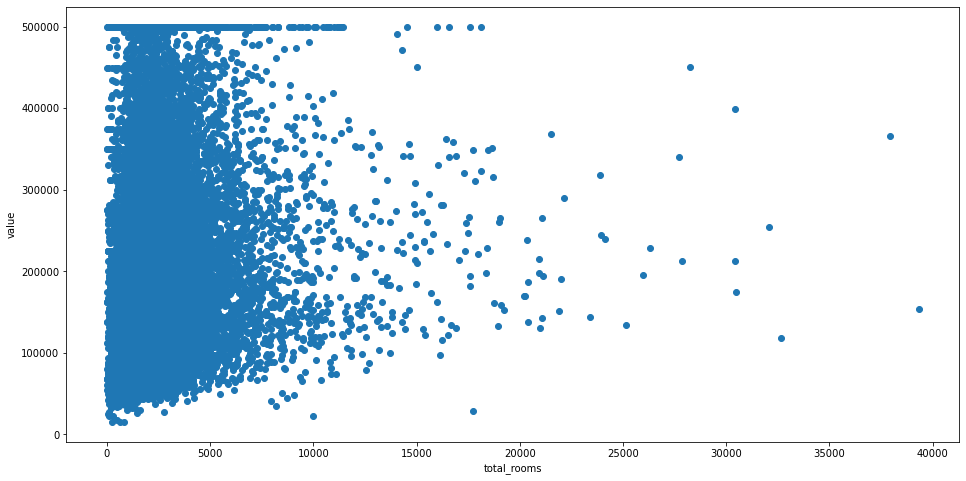

In [429]:
fig , ax = plt.subplots(figsize=(16,8))
ax.scatter (data['total_rooms'],data['median_house_value'])

ax.set_xlabel ('total_rooms')
ax.set_ylabel('value')
plt.show() 

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


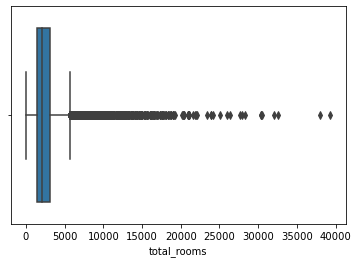

In [403]:
sns.boxplot(data['total_rooms'])
plt.show()

In [404]:
data['bedroom_per_totalroom']=data['total_bedrooms']/data['total_rooms']

In [405]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_totalroom
0,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600,3,0.146591
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500,3,0.155797
2,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100,3,0.129516
3,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300,3,0.184458
13,-122.26,37.84,52.0,696,191.0,345.0,1.0,2.6736,191300,3,0.274425


In [406]:
data['room_per_households']=data['total_rooms']/data['households']

In [407]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_totalroom,room_per_households
0,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600,3,0.146591,6.984127
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500,3,0.155797,6.238137
2,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100,3,0.129516,8.288136
3,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300,3,0.184458,5.817352
13,-122.26,37.84,52.0,696,191.0,345.0,1.0,2.6736,191300,3,0.274425,696.000000


In [408]:
data['population_per_households']=data['population']/data['households']

In [409]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_totalroom,room_per_households,population_per_households
0,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600,3,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500,3,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100,3,0.129516,8.288136,2.802260
3,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300,3,0.184458,5.817352,2.547945
13,-122.26,37.84,52.0,696,191.0,345.0,1.0,2.6736,191300,3,0.274425,696.000000,345.000000


In [410]:
corr_matrix=data.corr()
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude                    -0.125047
longitude                   -0.060249
population                  -0.030614
bedroom_per_totalroom       -0.028820
households                   0.020986
population_per_households    0.039277
total_bedrooms               0.045374
ocean_proximity              0.083447
room_per_households          0.087382
housing_median_age           0.107534
total_rooms                  0.127434
median_income                0.368293
median_house_value           1.000000
Name: median_house_value, dtype: float64

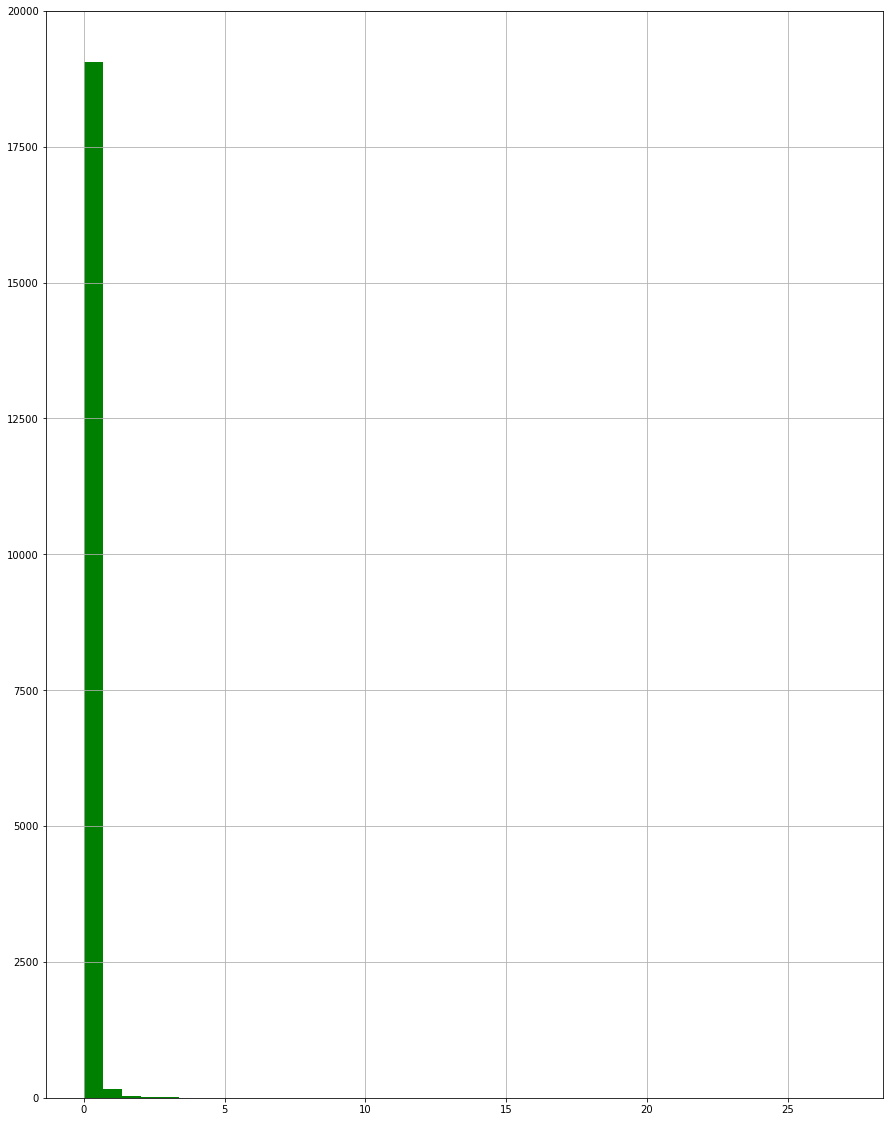

In [411]:
data['bedroom_per_totalroom'].hist(bins=40, figsize=(15,20), color='green')
plt.show()

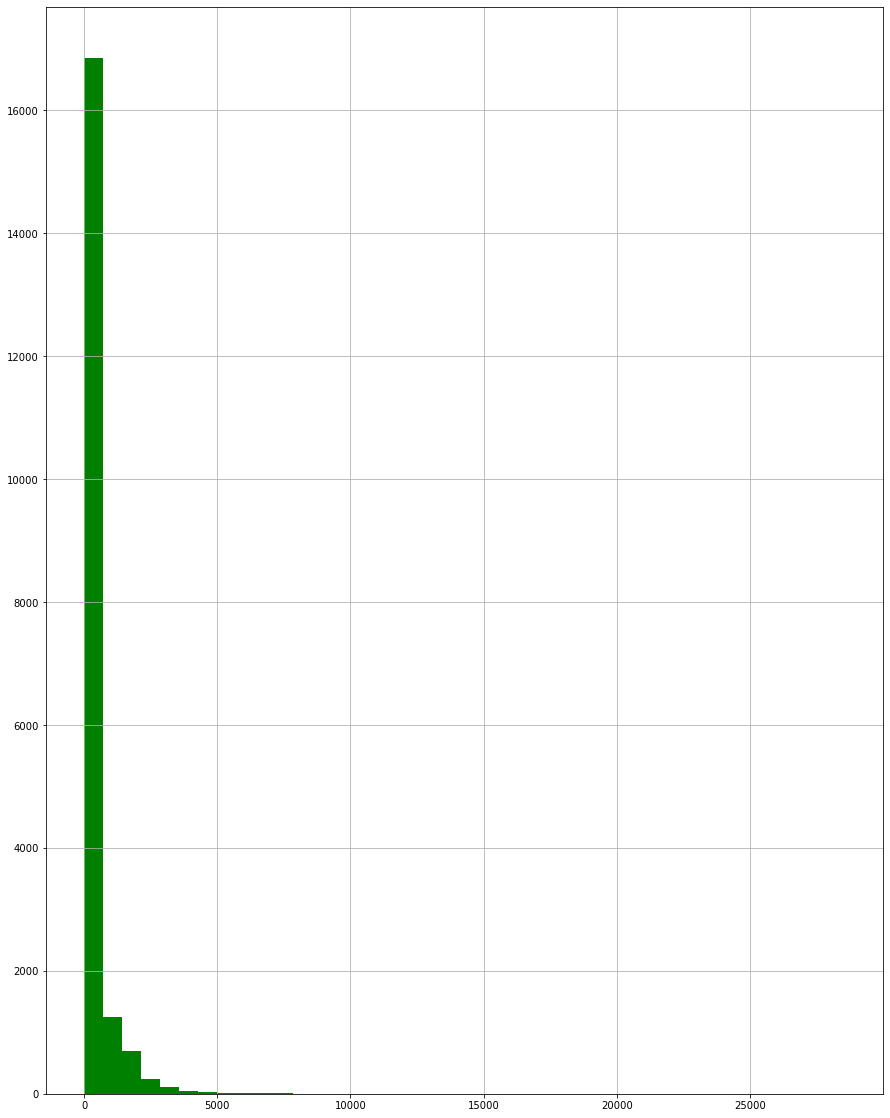

In [412]:
data['population_per_households'].hist(bins=40, figsize=(15,20), color='green')
plt.show()

In [413]:
data.isnull().sum()

longitude                    0
latitude                     0
housing_median_age           0
total_rooms                  0
total_bedrooms               0
population                   0
households                   0
median_income                0
median_house_value           0
ocean_proximity              0
bedroom_per_totalroom        0
room_per_households          0
population_per_households    0
dtype: int64

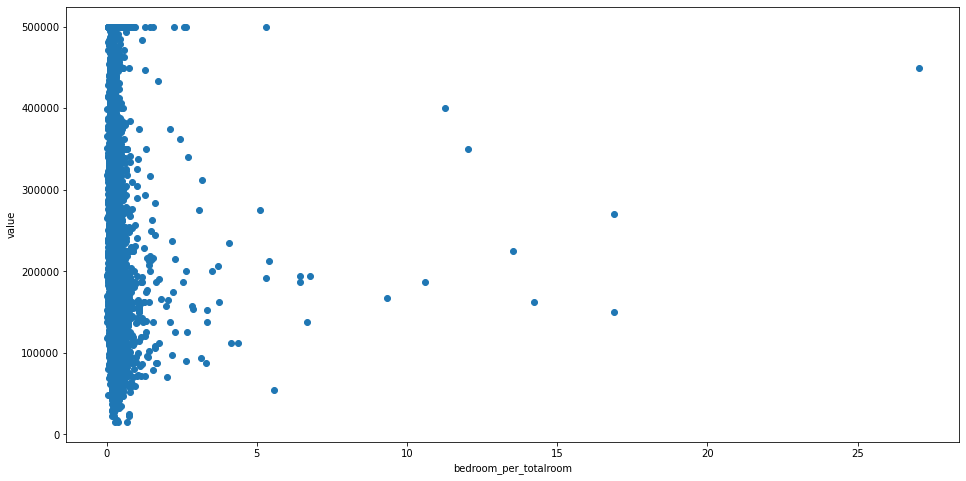

In [430]:
fig , ax = plt.subplots(figsize=(16,8))
ax.scatter (data['bedroom_per_totalroom'],data['median_house_value'])

ax.set_xlabel ('bedroom_per_totalroom')
ax.set_ylabel('value')
plt.show() 

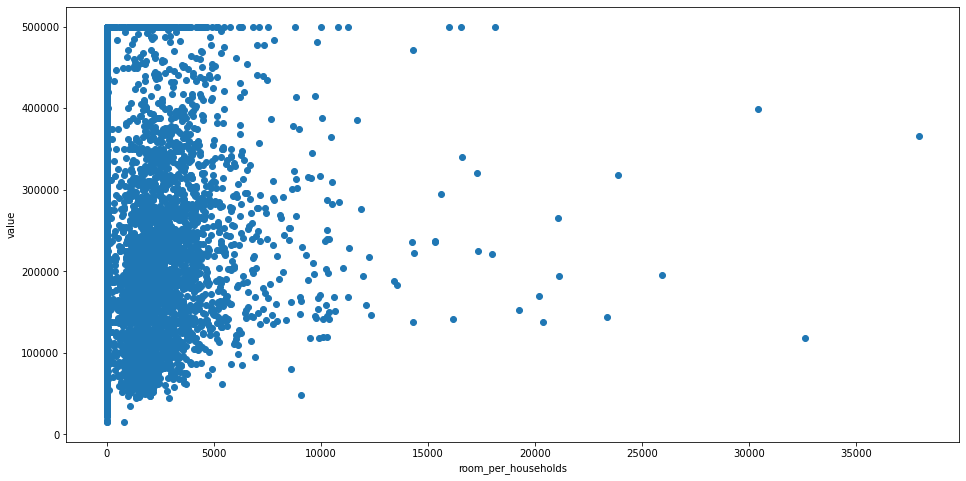

In [431]:
fig , ax = plt.subplots(figsize=(16,8))
ax.scatter (data['room_per_households'],data['median_house_value'])

ax.set_xlabel ('room_per_households')
ax.set_ylabel('value')
plt.show()

In [416]:
data1=data[['longitude','latitude','housing_median_age','median_income','median_house_value','ocean_proximity','bedroom_per_totalroom','room_per_households','population_per_households']]

In [315]:
data1

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,bedroom_per_totalroom,room_per_households,population_per_households
0,-122.23,37.88,41.0,8.3252,452600,3,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,8.3014,358500,3,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,7.2574,352100,3,0.129516,8.288136,2.802260
3,-122.25,37.85,52.0,5.6431,341300,3,0.184458,5.817352,2.547945
13,-122.26,37.84,52.0,2.6736,191300,3,0.274425,inf,inf
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100,1,0.224625,5.045455,2.560606
20636,-121.21,39.49,18.0,2.5568,77100,1,0.215208,6.114035,3.122807
20637,-121.22,39.43,17.0,1.7000,92300,1,0.215173,5.205543,2.325635
20638,-121.32,39.43,18.0,1.8672,84700,1,0.219892,5.329513,2.123209


In [417]:
data['room_per_households'].value_counts()

5.000000       22
4.000000       15
6.000000       15
4.500000       14
5.333333        9
               ..
1367.000000     1
8527.000000     1
5.544118        1
5.900560        1
4.982500        1
Name: room_per_households, Length: 17690, dtype: int64

In [418]:
data['population_per_households'].value_counts()

3.000000    26
2.000000    15
2.500000    14
2.666667    12
2.600000    10
            ..
1.897744     1
2.518900     1
2.807281     1
2.577869     1
5.500000     1
Name: population_per_households, Length: 16848, dtype: int64

In [419]:
data['bedroom_per_totalroom'].value_counts()

0.250000    26
0.200000    22
0.166667    17
0.181818     9
0.222222     9
            ..
0.205181     1
0.275000     1
0.308119     1
0.160889     1
0.312500     1
Name: bedroom_per_totalroom, Length: 17451, dtype: int64

In [420]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19284 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  19284 non-null  float64
 1   latitude                   19284 non-null  float64
 2   housing_median_age         19284 non-null  float64
 3   median_income              19284 non-null  float64
 4   median_house_value         19284 non-null  int64  
 5   ocean_proximity            19284 non-null  int32  
 6   bedroom_per_totalroom      19284 non-null  float64
 7   room_per_households        19284 non-null  float64
 8   population_per_households  19284 non-null  float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 1.4 MB


In [6]:
def find_outliers(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [2]:
median_house_value_indices, median_house_value_values = find_outliers(data['median_house_value'])
print("Outliers for median_house_value")
print(np.sort(median_house_value_values))



print("Outliers for median_income")
median_income_indices, median_income_values = find_outliers(data['median_income'])
print(np.sort(median_income_values))

NameError: name 'data' is not defined